# Linear and Logistic Regression 

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Question 1

Consider the following training data:

$\mathbf{x^{(1)}} =\begin{bmatrix} 1 \\ 1  \\ \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 2 \\ 1  \\ \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 1 \\ 3 \\ \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 3 \\ 3  \\ \end{bmatrix} $

$y^{(1)} = 1.4$, $y^{(2)} = 0.5$, $y^{(3)} = 2$, $y^{(4)} = 2.5$

Our goal is to fit a Linear Regression that minimizes the sum of squared errors on the training data.

❓ Find the closed form solution for a linear regression that minimizes the sum of squared errors on the training data. You need to:
 1. Define matrix $\mathbf{X}$ with shape $n \times (d+1)$, accounting for the bias parameter.
 2. Define target vector $\mathbf{y}$
 3. Use closed form solution to get optimal $\mathbf{\hat{w}}$

Useful functions: [`np.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)

In [ ]:
# Find w - your code here



# Add column with ones to handle the bias coefficient.



# Compute weights.


❓ Predict the target value for $\mathbf{x_{query}} = [2, 3]^\top$

In [11]:
# your code here


❓ Use the provided function `plot_hyperplane_3d` to plot the training data and the predicted hyperplane. 

In [12]:
'''
Function that plots hyperplane defined by weights w, sucht that w.x = 0.
points: matrix with observations where the fisrt column is supposed to be the bias constant column
target: target vector  
'''

def plot_hyperplane_3d(w, points, target):
    x1 = np.linspace(0, 4, 10)
    x2 = np.linspace(0, 4, 10)
    a, b = np.meshgrid(x1,x2)
    N = x1.size
    X = np.array([np.ones(N**2), a.ravel(), b.ravel()]).transpose()
    o = X.dot(w)
    
    ax = plt.figure().gca(projection='3d')
    ax.plot_surface(a, b, np.reshape(o,(N,N)), alpha=0.5,
                    linewidth=0, antialiased=True)
    ax.scatter(points[:,1], points[:,2], y, color='red')

In [13]:
# Plot your solution here


❓ Compute the mean squared error produced by the linear regression.

In [14]:
# your code here



## Question 2

Consider the following training data:

$\mathbf{x^{(1)}} =\begin{bmatrix} 3 \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 4 \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 6 \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 10 \end{bmatrix} $, 
 $\mathbf{x^{(5)}} =\begin{bmatrix} 12 \end{bmatrix} $

$y^{(1)} = 1.5$, $y^{(2)} = 11.3$, $y^{(3)} = 20.4$, $y^{(4)} = 35.8$, $y^{(5)} = 70.1$

❓ Define `x` and `y` arrays with your data and plot it.

*Hint:* Think about what shape your data should have. E.g.:`x.shape` should be `(5,1)`

In [15]:
# Your code here


It is useful to consider non-linear regressions. In this question you will adopt **feature transformations** in order to fit non-linear regressions on the training data.

❓ Apply a logarithmic transformation $\phi(x_1) = log(x_1)$ and write down the closed form solution for this non-linear regression that minimizes the sum of squared errors on the training data. 

❓ Complete function `non_linear_regression` below:

In [16]:
'''
Inputs:
    x - vector of 1D observations, should have shape (n x 1)
    y - target vector, should have shape (n,)
    phi - function (feature transformation to apply)

Output: 
    X_phi - feature matrix of shape (n x 2) (accounting for bias)
    w - vector of weights found by the Least Squares Method
'''

def non_linear_regression(x,y,phi):
    # Apply transformation
    
    # Construct X vector (accounting for bias)
    
    # Find solution
        
    return X_phi, w


❓ Fit a regression on the training data with transformation $\phi(x_1) = log(x_1)$.

❓ Fit a regression on the training data with transformation $\phi(x_1) = x_1^2$.

In [17]:
def phi1(x):
    return np.log(x)
def phi2(x):
    return x**2

In [18]:
# Your code here


❓ Plot both regressions along with the training points.

In [20]:
#plt.scatter(x,y)
# your regressions here 


plt.show()

❓ Which one is a better fit? 

In [21]:
# Your code here



❓ **(Optional):** Generalize your function to be able to apply several feature transformations, *i.e.*, to perform regressions of type:

$$\hat{y}(x) = w_0 + w_1\phi_1(x) + ... + w_d\phi_d(x)$$

Use your function to fit a polynomial of degree 3 to the training data.

In [22]:
def multi_non_linear_regression(x,y,phi_list):
        
    # Construct X vector (accounting for bias):
    
    
    # Find solution
    
    
    return X_phi, w

## Question 3

In this exercise, we will consider binary logistic regression:


$$p_{\mathbf{w}}\left(y=1 \mid \mathbf{x}\right) = \sigma(\mathbf{w} \cdot \mathbf{x}) = \frac{1}{1+\exp\left(-\mathbf{w}\cdot\mathbf{x}\right)}$$

with the following training data:


$\mathbf{x^{(1)}} =\begin{bmatrix} -1 \\ 0  \\ \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 0 \\ 0.25  \\ \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 1 \\ -1  \\ \end{bmatrix} $

$y^{(1)} = 0$, $y^{(2)} = 1$, $y^{(3)} = 1$, $y^{(4)} = 0$

using the cross-entropy loss function.

❓ Complete function `lr_batch_gd` that computes one epoch of batch gradient descent for the logistic regression with cross-entropy loss:

In [23]:
'''
Receives:
    inputs: observations array of shape (n x (p+1)) accounting for bias
    labels: array of target values of shape (n, )
    w: initial array of weights shape ((p+1), )
    eta: scalar for learning rate
Returns:
    w: updated weights
'''

def lr_batch_gd(inputs, labels, w, eta):
    # Compute vector of probabilities of size p+1.

    # Compute gradient of loss function; vector of size p+1.

    # Gradient descent update of w
    return w

❓ Test your function on the provided training data assuming an initialization of all zeros for the weights and a learning rate of $\eta=1$

In [24]:
x = np.array([[-1,0],
              [0, 0.25],
              [1, 1],
              [1, -1]])

# Adding column of 1s to account for bias
inputs = np.concatenate([np.ones((x.shape[0],1)), x], axis = 1)

y = np.array([0, 1, 1, 0])

# Initialize weights and set learning rate


# Test function


Let us now use **stochastic gradient descent** where we make one weight update for each training example, i.e. in one epoch there should be $n$ weight updates.

❓ Complete function `lr_sgd` to execute one epoch of stochastic gradient descent. Test your function on the training data.

*Hint:* Python's [`zip`](https://www.geeksforgeeks.org/zip-in-python/) function is useful to iterate through several lists/arrays in parallel. 

In [25]:
'''
Receives:
    inputs: observations array of shape (n x (p+1)) accounting for bias
    labels: array of target values of shape (n, )
    w: initial array of weights shape ((p+1), )
    eta: scalar for learning rate
Returns:
    w: updated weights
'''

def lr_sgd(inputs, labels, w, eta):
    # For each training example 
    
        # Compute probability y_hat
        
        # Compute gradient
        
        # Update weights:
        
    return w

❓ Compute 3 epochs of SGD on your training data and use the provided `plot_separation_line` to see your end results.

In [146]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == 0, 1], inputs[labels == 0, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    
    # Plot model separation line.
    # w0 + w1*x1 + w2*x2 = 0.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

In [27]:
# Run 3 epochs

# Plot hyperplane


## Question 4

Logistic Regression can also be used for multi-class classification. We will use logistic regression on real data to solve the task of classifying handwritten digits.

The dataset is loaded below: 

There are 1797 observations with 64 features classified into 10 classes.


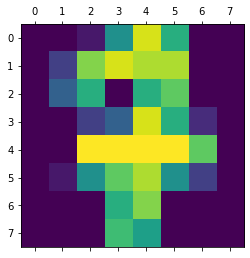

In [30]:
from sklearn.datasets import load_digits
data = load_digits()

inputs = data.data  # num_examples x num_features
labels = data.target  # num_examples x num_labels

n, p = np.shape(inputs)
n_classes = len(np.unique(labels))  # labels are 0, 1, ..., num_labels-1

print(f'There are {n} observations with {p} features classified into {n_classes} classes.')

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((n, 1)), inputs], axis=1)

# Observation example
plt.matshow(data.images[17])
plt.show()

❓ Complete function `multi_class_lr_epoch` to run one epoch of stochastic gradient descent for multi-class logistic regression.

*Hint:* When dealing with matrix calculus one needs to be careful with dimensions. An array with shape `(n,)` is not the same as an array with shape `(n,1)`. Function [`np.expand_dims`](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html) is one way to reshape your arrays into the desired format.

In [28]:
'''
Receives:
    inputs: observations array of shape (n x (p+1)) accounting for bias
    labels: array of target values of shape (n, )
    W: initial array of weights of shape (n_classes x (p+1) )
    eta: scalar for learning rate
Returns:
    w: updated weights
'''
def multi_class_lr_epoch(inputs, labels, W, eta):
    # For each observation in data
        
        # Get probability scores according to the model (num_labels x 1).

        # One-hot encode true label (num_labels x 1).


        # Softmax function
        # This gives the label probabilities according to the model (num_labels x 1).
        
        # SGD update. W is num_labels x num_features.
    return W

Let's split the data into train an test sets:

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

❓ Run 100 epochs of your multi-class Logistic Regression algorithm on the training data, initializing weight matrix with zeros and learning rate of 0.001.

In [32]:
# Your code here

❓ Complete function `multi_class_classify` to generate predicted labels for provided inputs and trained weights $W$.

In [33]:
'''
Receives:
    inputs: observations of shape (n x (p+1))
    W: weight matrix of shape (n_classes x p+1)
Outputs: 
    y_hat: array of predicted labels of shape (n,)
'''

def multi_class_classify(inputs, W):
    # Complete function
    
    
    return y_hat

❓ Use your function to obtain predictions for both train and test sets and compute their accuracy scores.

In [34]:
# Your code here

We can compare our results with the ones obtained with Sklearn's implementation of Logistic Regression:

In [223]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=False, penalty='none')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9583333333333334
